# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>

## Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_theme(style='dark', font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

### 1.  Cкачаем [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) о предсказании пульсаров.

Пульсары &mdash; это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

Пульсары представляют значительный научный интерес. Поэтому есть потребность в автоматической идентификации интересных объектов для ускорения процесса изучения. На практике почти все обнаружения вызваны радиочастотными помехами и шумом, что затрудняет поиск достоверных сигналов. В последнее время для автоматического обнаружения пульсаров начали применять машинное обучение. Актуальная задача сегодня &mdash; бинарная классификация объектов-кандидатов на предмет того, являются ли они пульсарами.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

Мы будем работать только с файлом `pulsar_data_train.csv`.

In [2]:
data = pd.read_csv('C:/Users/cara_/Documents/pulsar_data_train.csv')

Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (<a target="_blank" href="http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf">ссылка</a>, слайд 11). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Кроме того, импульс приходит в разное время на разных частотах. Задержка от частоты к частоте вызвана наличием ионизированной межзвездной среды и называется дисперсией. Не путать с дисперсией в теории вероятностей.

С дисперсией связана еще одна характеристика объекта &mdash; DM-SNR кривая. Подробнее о ней можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Обе характеристики, integrated profile и DM-SNR кривая, представляют собой одномерные функции.
При создании датасета значения функций были посчитаны в конечном количестве $n$ точек.
Фактически, были получены реализации выборки двух случайных величин.

Пусть $P = (p_1, \ldots p_n)$ &mdash; массив значений integrated profile.
Для него можно посчитать следующие величины:

1.   Выборочное среднее $\bar p = \frac{1}{n}\sum \limits_{i=1}^n p_i$;
2.   Выборочное стандартное отклонение $\sqrt{\frac{1}{n}\sum \limits_{i=1}^n (p_i - \bar p)^2}$;
3. Выборочный коэффициент асимметрии (skewness);
4. Выборочный коэффициент эксцесса (kurtosis).

Для $D = (d_1, \ldots d_n)$, массива значений DM-SNR, аналогично.

Именно эти значения по массивам $P$ и $D$ являются признаками в данном датасете.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.










In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


### 2. Предобработаем данные.

В этом датасете в некоторых столбцах есть пропуски в данных. Об этом говорит то, что значение Non-Null Count в таблице выше не равно количеству строк для некоторых столбцов. Чтобы не усложнять себе жизнь, пока просто не будем брать эти столбцы для анализа.

Посчитайем число пропусков в каждой колонке:

In [5]:
data.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

Удалите все соответствующие строчки:

In [19]:
data.dropna(inplace=True)

Теперь возьмем только некоторые столбцы в качестве независимых переменных и выделим зависимую. Столбец `target_class` отвечает за целевую переменную — индикатор того, является ли объект пульсаром.

In [34]:
needed_columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve']  # Используем только эти столбцы

X = data[needed_columns]
y = data['target_class']

## 3. Графики

Проведем визуальный анализ данных. Построим оценки плотности по каждому признаку отдельно для каждого класса. Какие признаки лучше всего разделяют классы? Как это отразится на результатах модели?

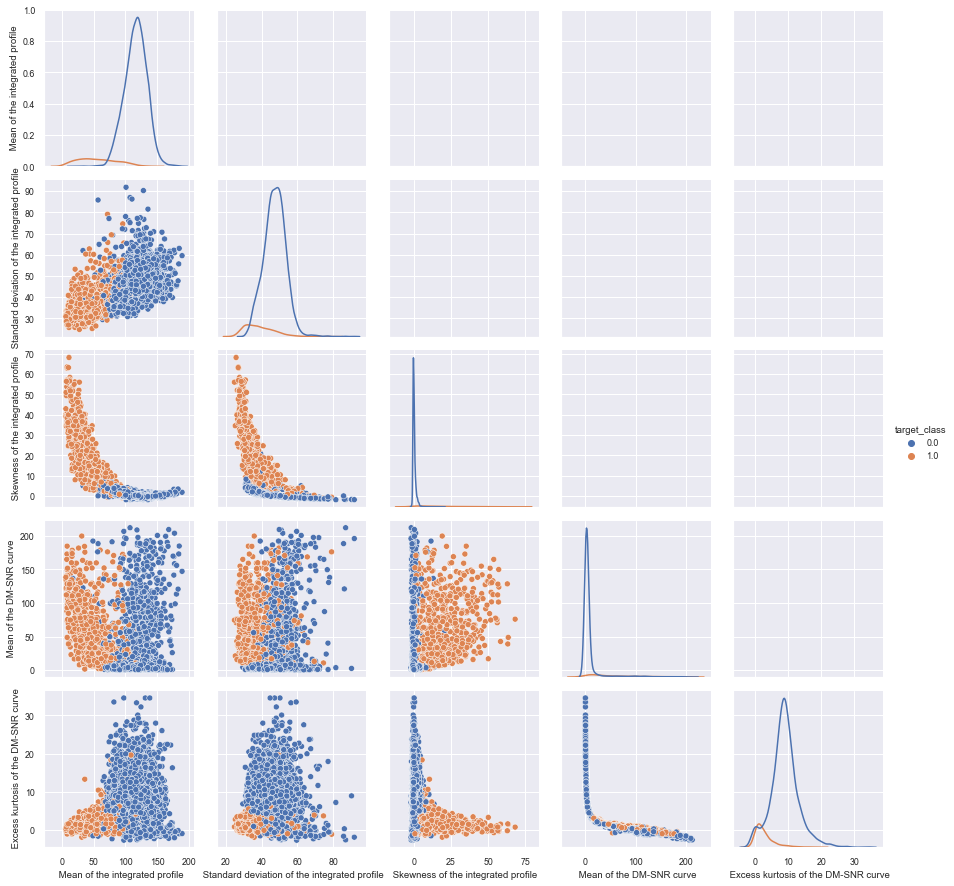

In [21]:
sns.set_theme(font_scale=0.8)

plot = sns.PairGrid(data, x_vars=needed_columns, y_vars=needed_columns, hue="target_class", diag_sharey=False)

plot.map_diag(sns.kdeplot)
plot.map_lower(sns.scatterplot)
plot.add_legend()

**Ответ:** лучше всего разделяют на классы ' Mean of the integrated profile', ' Skewness of the integrated profile' тогда значения этих признаков будут вносить больший вклад в модель.

### 4. Разделим датасет и трансформируем данные

Добавьте  свободный член, присоединив столбец из единиц к `X`. Случайно разделите выборку на обучающую и тестовую части в соотношении 4:1.

In [25]:
X["intercept"] = [1] * 9273

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,intercept
1661,80.531250,43.516868,2.200255,69.884615,0.822128,1
7257,102.414062,42.225682,1.088009,3.361204,8.379186,1
103,122.429688,52.139489,0.013025,15.739967,2.913488,1
3960,104.828125,51.938532,-0.105685,2.444816,8.567573,1
3493,96.218750,40.579578,1.638129,2.517559,8.472030,1
...,...,...,...,...,...,...
7714,115.351562,44.753944,0.099694,9.908027,3.819093,1
6974,124.679688,51.510911,-0.234227,5.834448,5.741135,1
7245,76.234375,37.585212,3.419548,3.501672,7.557574,1
1119,113.156250,39.633169,1.663130,5.757525,5.682965,1


У признаков должен быть одинаковый масштаб. Преобразуйте датасет соответствующим образом.

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5. Обучим модель

Создайте и обучите логистическую регрессию. `fit_intercept` укажите `True`.

In [27]:
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

LogisticRegression()

Напечатайте коэффициенты модели. О чём говорят знаки `+` и `-`? Почему коэффициент, отвечающий за единичный столбец, равен нулю?

In [28]:
model.coef_, model.intercept_

(array([[-1.46324697,  0.52265651,  3.07670363, -0.37536413, -1.35038179,
          0.        ]]),
 array([-3.64979389]))

**Выводы:** Знаки плюс и минус в коэффициентах модели логистической регрессии указывают на то, как влияет каждый из признаков на вероятность принадлежности к определенному классу. Положительный коэффициент означает, что увеличение значения признака приводит к увеличению логита для данного класса, что означает увеличение вероятности принадлежности к этому классу. В то же время отрицательный коэффициент означает обратное. 

Коэффициент, отвечающий за единичный столбец (intercept), равен нулю, потому что он представляет базовый уровень логистической регрессии, т.е. начальное значение логита, когда значения всех признаков равны нулю. 

### 6. Проверим качество модели

Для  объектов из тестовой выборки оцените вероятность того, что это пульсар, при помощи метода [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Выведите эти значения, а также итоговые предсказания модели методом `predict`

In [31]:
print(model.predict_proba(X_test))
y_pred = model.predict(X_test)
print(y_pred)

[[0.95920199 0.04079801]
 [0.95537927 0.04462073]
 [0.95976929 0.04023071]
 ...
 [0.99865184 0.00134816]
 [0.89298567 0.10701433]
 [0.99841907 0.00158093]]
[0. 0. 0. ... 0. 0. 0.]


Теперь проверим качество нашей модели. Посчитайте его на тестовой выборке при помощи метрики Accuracy, показывающей долю правильных предсказаний:
$$
    Accuracy(y, \widehat{y}) = \frac{1}{n}\sum^{n-1}_{i = 0} I\{\widehat{y_i} = y_i\}
$$

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9773584905660377

Другими важными метриками для оценки качества модели являются precision, recall и F1. Precision показывает точность нашей модели, то есть долю правильно классифицированных объектов из всех, которым был присвоен первый класс. Recall - это полнота модели, то есть доля правильно классифицированных объектов из всех. F1 суммирует результаты этих двух метрик, считая их среднее гармоническое. Чуть подробнее можно прочитать про эти величины в [статье](https://habr.com/ru/articles/661119/).

<img width=450 src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png">

Посчитайте все три метрики для вашей модели. Сделайте выводы о качестве предсказаний.

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)


(0.9618320610687023, 0.7730061349693251, 0.8571428571428571)

**Выводы:** точность модели достаточно высокая на большом объеме данных, она надежно принадлежность к первому классу, модель делает много корректных предсказаний этого класса и мало неверных (высокое значение precision). относительно невысокий recall_score говорит что корректность предсказания первого класса соответствующая. модель имеет большую precision, но низкий recall, т.е в общем она делает высокоточные предсказания для первого класса, но производит всего несколько таких прогнозов. recall и precision одновременно не демонстрируют обычно высокие значения а как бы "балансируют" одно в ущерб другому.